## plot mAP curve of adapted model on the target validation set

In [2]:
import os
import subprocess
import json
import re
import matplotlib.pyplot as plt
from pathlib import Path

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-y_t7rtxt because the default path (/home/guest/r11922a05/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [15]:
model_dir = "./cache/0510/1683687288/"
pred_dir = "./prediction/0511"
Path(pred_dir).mkdir(parents=True, exist_ok=True)

final_iter = 100000
begin_iter = 0
step = 2000
num_check = (final_iter - begin_iter) // step

In [13]:
for i in range(1, num_check+1):
    if i == num_check:
        model_path = os.path.join(model_dir, "model_final.pth")
        pred_path = os.path.join(pred_dir, "pred_final.json")
    else:
        cur_iter = int(begin_iter + i * step)
        model_path = os.path.join(model_dir, "model_{:07d}.pth".format(cur_iter))
        pred_path = os.path.join(pred_dir, "pred_{:07d}.json".format(cur_iter))
    print("Load model from ", model_path)
    batcmd = f"bash hw3_inference.bash hw3_dataset_copy {pred_path} 3 {model_path}"
    subprocess.check_output(batcmd, shell=True)
    print("="*20)

Load model from  ./cache/0510/1683687288/model_0096000.pth


  0%|          | 0/300 [00:00<?, ?it/s]/home/guest/r11922a05/anaconda3/envs/cvdpl-hw3-mic/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525552843/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 300/300 [00:59<00:00,  5.01it/s]


Load model from  ./cache/0510/1683687288/model_0098000.pth


  0%|          | 0/300 [00:00<?, ?it/s]/home/guest/r11922a05/anaconda3/envs/cvdpl-hw3-mic/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525552843/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 300/300 [00:57<00:00,  5.24it/s]


Load model from  ./cache/0510/1683687288/model_final.pth


  0%|          | 0/300 [00:00<?, ?it/s]/home/guest/r11922a05/anaconda3/envs/cvdpl-hw3-mic/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525552843/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 300/300 [01:00<00:00,  4.99it/s]


In [16]:
# retrieve the result of each model

iter_list = []
map_list = []

for i in range(1, num_check+1):
    if i == num_check:
        cur_iter = final_iter
        pred_path = os.path.join(pred_dir, "pred_final.json")
    else:
        cur_iter = int(begin_iter + i * step)
        pred_path = os.path.join(pred_dir, "pred_{:07d}.json".format(cur_iter))
    
    print("Load predict json from ", pred_path)
    batcmd = f"python3 check_your_prediction_valid.py {pred_path} hw3_dataset/fog/val.coco.json"
    result = subprocess.check_output(batcmd, shell=True)
    result = result.decode("utf-8").split("\n")[1].split()[3] #'tensor(XXXX),'
    map_50 = float(re.findall(r'\d+\.\d+', result)[0])
    print("iter: ", cur_iter, ", map_50: ", map_50)
    iter_list.append(cur_iter)
    map_list.append(map_50)

Load predict json from  ./prediction/0511/pred_0002000.json


In [ ]:
plt.plot(iter_list[1:], map_list)

# add labels for x and y axis
plt.xticks(rotation=45)
plt.xlabel("number of iterations")
plt.ylabel("mAP")

# show the plot
plt.show()
plt.savefig("adapted_model_map_curve.png")

## iter = 40000 

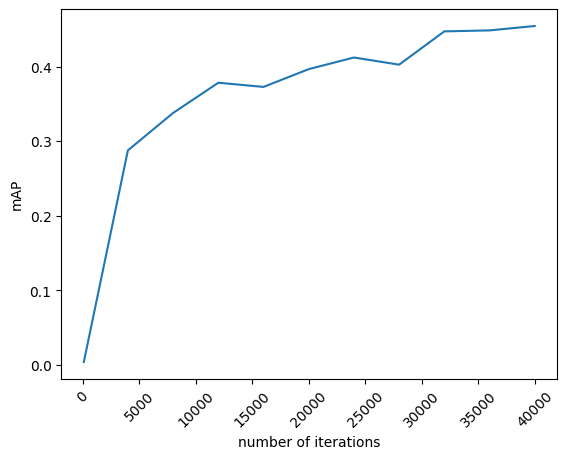

<Figure size 640x480 with 0 Axes>

In [88]:
plt.plot(iter_list[1:], map_list)

# add labels for x and y axis
plt.xticks(rotation=45)
plt.xlabel("number of iterations")
plt.ylabel("mAP")

# show the plot
plt.show()
plt.savefig("adapted_model_map_curve.png")

# Check tsv file (backbone)

In [ ]:
import pandas as pd

df = pd.read_csv('backbone_features_adapted_foggy.tsv', sep='\t')
print(df.shape)

ModuleNotFoundError: No module named 'pandas.compat'